<h1 style = "color : Brown"> Bike Sharing Assignment </h1>

## * Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## * Questions:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

## * Business Goal:

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## 1. Importing Libraries

In [1]:
# imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## 2. Reading Dataset and Understanding Data

In [2]:
# Read the csv file using pandas
bs = pd.read_csv('day.csv')

In [3]:
# Inspect first few rows
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check the shape
bs.shape

(730, 16)

#### `Inference`
So, There are __730 Rows__ &__16 Columns__.

In [5]:
# check the null values and data type
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### `Inference`

So, There are __no null__ Values

## 3. Cleaning Data

### 3.1 Dropping irrelevent columns:

- __instant__ is just a row instance identifier.

In [6]:
# Dropping instance column

bs.drop(['instant'], axis = 1, inplace = True)

In [7]:
# Verify instance column

bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


### 3.2 Dropping unimportant variable / redundant:

- __dteday__ Already extracted the required information. 
- __atemp__ multicolumn with __temp__
- __casual__ and __registered__ because __cnt__ = __casual + registered__

In [8]:
# Dropping instance column

bs.drop(['dteday'], axis = 1, inplace = True)

In [9]:
# Dropping atemp column

bs.drop(['atemp'], axis = 1, inplace = True)

In [10]:
# Dropping casual and registered columns

bs.drop(['casual'], axis = 1, inplace = True)
bs.drop(['registered'], axis = 1, inplace = True)

In [11]:
# Verify Dropped columns: 

bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [12]:
# Check head of the columns: 

bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


### 3.3 Outliers checking: 

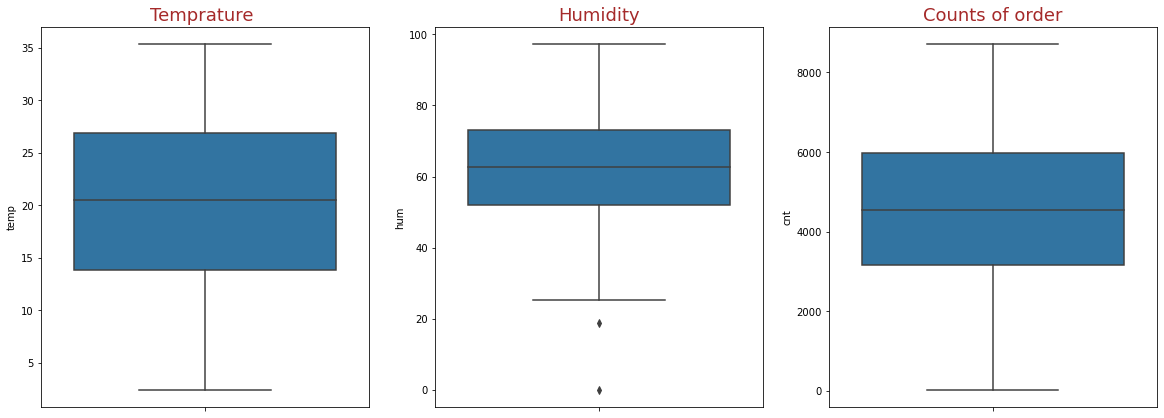

In [13]:
# temp

plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
sns.boxplot(data=bs, y="temp")
plt.title("Temprature ", fontdict={"fontsize":18, "color":"Brown"})

# hum

plt.subplot(1,3,2)

sns.boxplot(data=bs, y="hum")
plt.title("Humidity", fontdict={"fontsize":18, "color":"Brown"})

# cnt

plt.subplot(1,3,3)
sns.boxplot(data=bs, y="cnt")
plt.title("Counts of order", fontdict={"fontsize":18, "color":"Brown"})
plt.show()

#### `Inference`
    From these plots, we can see there are no outliers to be handled.

# 4. EDA

## 4.1 Understanding the variable type: 

    - Binary      : yr, holiday, workingday
    - Categorical : season, weekday, mnth, weathersit
    - Numerical   : temp, hum, windspeed, cnt

## 4.2 Univariate Analysis: 

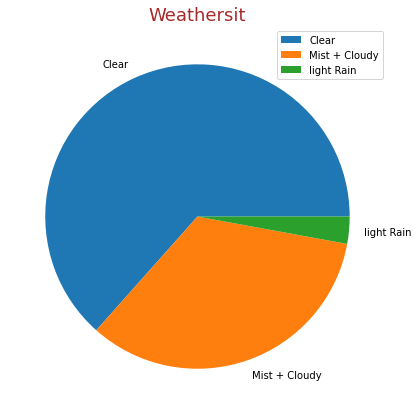

In [14]:
# weathersit

w_x = bs.weathersit.value_counts()
labels = ['Clear', 'Mist + Cloudy', 'light Rain']

plt.figure(figsize=[7,7])
plt.pie(w_x, labels=labels)
plt.title("Weathersit", fontdict={"fontsize":18, "color":"Brown"})
plt.legend()
plt.show()

#### `Inference`
    It means in Clear Weather number of orders are more than Rainy Weather
    

## 4.3 Bivariate Analysis: 

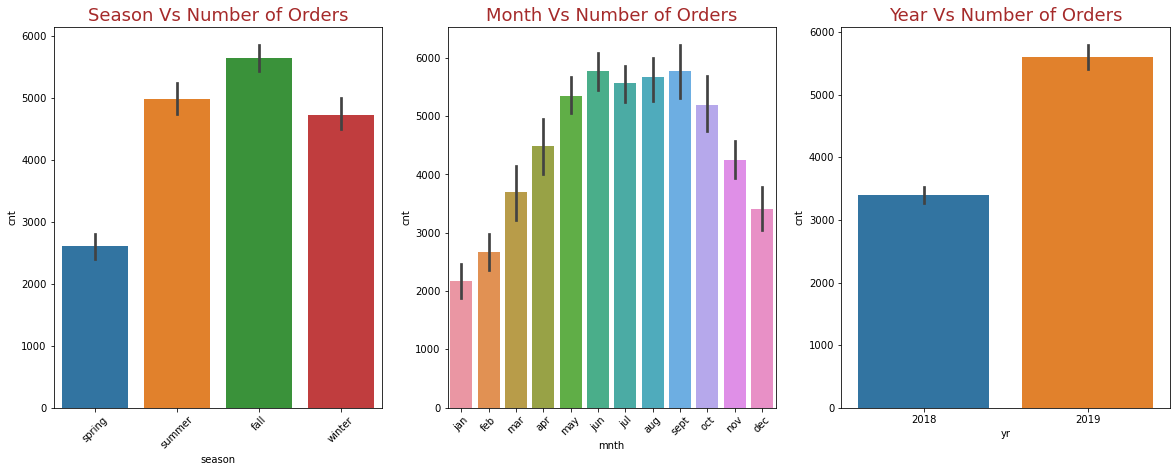

In [15]:
# season vs cnt:

plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
sns.barplot(data=bs, x="season", y="cnt")
plt.xticks([0,1,2,3],["spring","summer","fall","winter"])
plt.xticks(rotation= 45)
plt.title("Season Vs Number of Orders", fontdict={"fontsize":18, "color":"Brown"})

# mnth vs cnt:

plt.subplot(1,3,2)

sns.barplot(data=bs, x="mnth", y="cnt")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec'])
plt.xticks(rotation= 45)
plt.title("Month Vs Number of Orders", fontdict={"fontsize":18, "color":"Brown"})

# yr vs cnt:

plt.subplot(1,3,3)
sns.barplot(data=bs, x="yr", y="cnt")
plt.xticks([0,1],[2018,2019])
plt.title("Year Vs Number of Orders", fontdict={"fontsize":18, "color":"Brown"})

plt.show()

#### `Inference`    
    - In Autumn(fall) season there are highest no. of order gets counted.
    - In Sept month there are highest number of order gets counted & in Jan there are lower number of order gets counted. By starting the year orders are increasing and from october orders are decreasing.
    - We can see no. of order increase in 2019 compare to 2018    

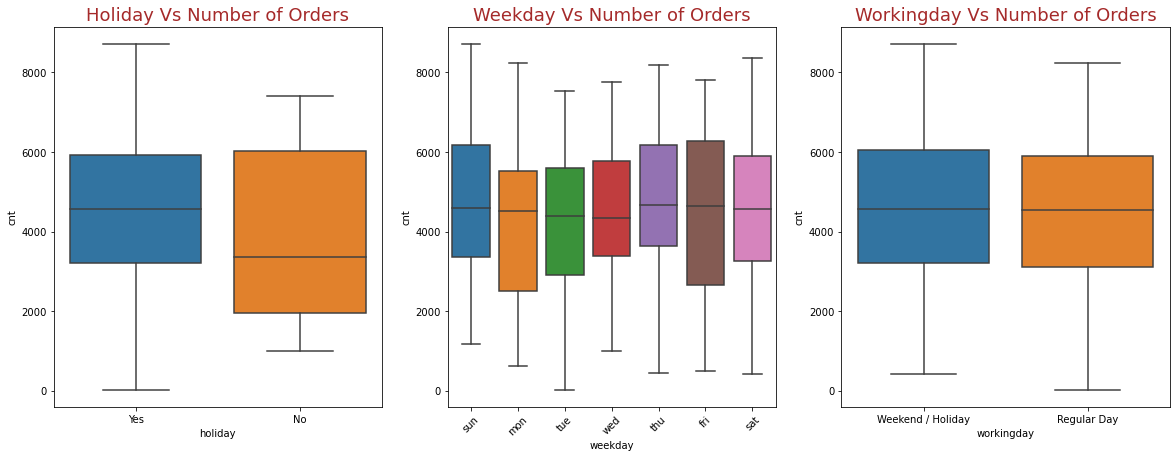

In [16]:
# holiday vs cnt:

plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
sns.boxplot(data=bs, x="holiday", y="cnt")
plt.xticks([0,1],["Yes","No"])
plt.title("Holiday Vs Number of Orders", fontdict={"fontsize":18, "color":"Brown"})

# weekday vs cnt:

plt.subplot(1,3,2)
sns.boxplot(data=bs, x="weekday", y="cnt")
plt.xticks([0,1,2,3,4,5,6],['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'])
plt.xticks(rotation= 45)
plt.title("Weekday Vs Number of Orders", fontdict={"fontsize":18, "color":"Brown"})

# workingday vs cnt:

plt.subplot(1,3,3)
sns.boxplot(data=bs, x="workingday", y="cnt")
plt.xticks([0,1],["Weekend / Holiday", "Regular Day"])
plt.title("Workingday Vs Number of Orders", fontdict={"fontsize":18, "color":"Brown"})


plt.show()

#### `Inference`    
    - In Holidays number of orders Decreased.
    - For weekday there are nothing can differentiate.

## 4.4 Linear Regression: 

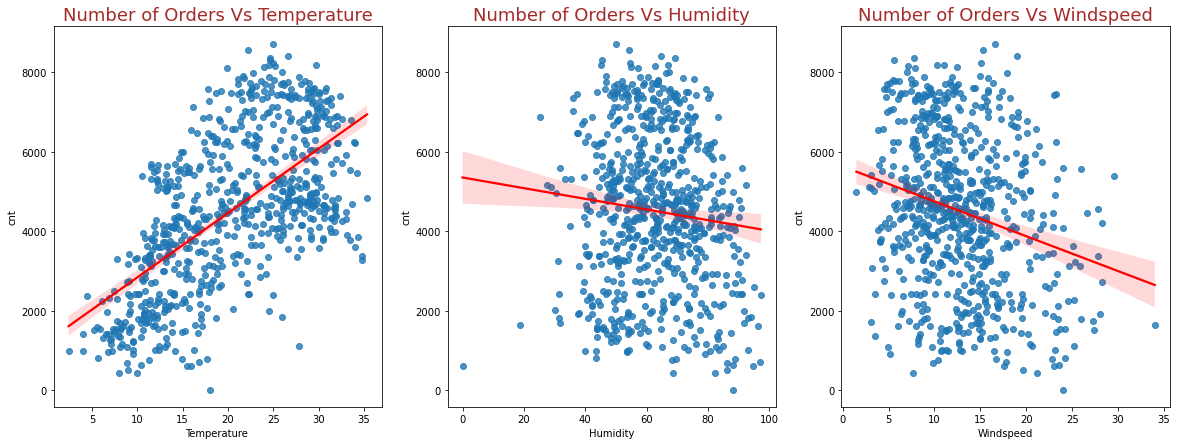

In [17]:
# cnt vs temp:

plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
sns.regplot(data=bs, x="temp", y="cnt", line_kws={"color": "red"})
plt.xlabel("Temperature ")
plt.title("Number of Orders Vs Temperature", fontdict={"fontsize":18, "color":"Brown"})

# cnt vs hum:

plt.subplot(1,3,2)
sns.regplot(data=bs, x="hum", y="cnt", line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.title("Number of Orders Vs Humidity", fontdict={"fontsize":18, "color":"Brown"})

# cnt vs windspeed:

plt.subplot(1,3,3)
sns.regplot(data=bs, x="windspeed", y="cnt", line_kws={"color": "red"})
plt.xlabel("Windspeed")
plt.title("Number of Orders Vs Windspeed", fontdict={"fontsize":18, "color":"Brown"})

plt.show()

#### `Inference`    
    - Number of Orders are positively correlated to temp.
    - Number of Orders is linearly increasing with Temperature  indicating linear relation.
    - Increasing the Humidity Number of Orders are Decreasing
    - Increasing the Windspeed Number of Orders are Decreasing 
    
so, We can say that __Number of Orders are maters weather condition__.

# 5. Converting categorical variables to the right format

In [18]:
# season

bs.season.replace({1:"spring",
                   2:"summer",
                   3:"fall",
                   4:"winter"},inplace = True)
bs = pd.get_dummies(data=bs, columns=["season"])

In [19]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   mnth           730 non-null    int64  
 2   holiday        730 non-null    int64  
 3   weekday        730 non-null    int64  
 4   workingday     730 non-null    int64  
 5   weathersit     730 non-null    int64  
 6   temp           730 non-null    float64
 7   hum            730 non-null    float64
 8   windspeed      730 non-null    float64
 9   cnt            730 non-null    int64  
 10  season_fall    730 non-null    uint8  
 11  season_spring  730 non-null    uint8  
 12  season_summer  730 non-null    uint8  
 13  season_winter  730 non-null    uint8  
dtypes: float64(3), int64(7), uint8(4)
memory usage: 60.0 KB


In [20]:
# weathersit

bs.weathersit.replace({1:'good',
                       2:'moderate',
                       3:'bad',
                       4:'severe'},inplace = True)
bs = pd.get_dummies(data=bs, columns=["weathersit"])

In [21]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   mnth                 730 non-null    int64  
 2   holiday              730 non-null    int64  
 3   weekday              730 non-null    int64  
 4   workingday           730 non-null    int64  
 5   temp                 730 non-null    float64
 6   hum                  730 non-null    float64
 7   windspeed            730 non-null    float64
 8   cnt                  730 non-null    int64  
 9   season_fall          730 non-null    uint8  
 10  season_spring        730 non-null    uint8  
 11  season_summer        730 non-null    uint8  
 12  season_winter        730 non-null    uint8  
 13  weathersit_bad       730 non-null    uint8  
 14  weathersit_good      730 non-null    uint8  
 15  weathersit_moderate  730 non-null    uin

In [22]:
# mnth

bs.mnth.replace({1: 'jan',
                 2: 'feb',
                 3: 'mar',
                 4: 'apr',
                 5: 'may',
                 6: 'jun',
                 7: 'jul',
                 8: 'aug',
                 9: 'sept',
                 10: 'oct',
                 11: 'nov',
                 12: 'dec'},inplace = True)
bs = pd.get_dummies(data=bs, columns=["mnth"])

In [23]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   weekday              730 non-null    int64  
 3   workingday           730 non-null    int64  
 4   temp                 730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_fall          730 non-null    uint8  
 9   season_spring        730 non-null    uint8  
 10  season_summer        730 non-null    uint8  
 11  season_winter        730 non-null    uint8  
 12  weathersit_bad       730 non-null    uint8  
 13  weathersit_good      730 non-null    uint8  
 14  weathersit_moderate  730 non-null    uint8  
 15  mnth_apr             730 non-null    uin

In [24]:
# weekday

bs.weekday.replace({0: 'sun',
                    1: 'mon',
                    2: 'tue',
                    3: 'wed',
                    4: 'thu',
                    5: 'fri',
                    6: 'sat'}, inplace=True)
bs = pd.get_dummies(data=bs, columns=["weekday"])

In [25]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   season_fall          730 non-null    uint8  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  weathersit_bad       730 non-null    uint8  
 12  weathersit_good      730 non-null    uint8  
 13  weathersit_moderate  730 non-null    uint8  
 14  mnth_apr             730 non-null    uint8  
 15  mnth_aug             730 non-null    uin

In [26]:
pd.set_option("display.max_columns", None)
bs.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,weathersit_bad,weathersit_good,weathersit_moderate,mnth_apr,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
bs.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_apr',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

# 6. Train and Split

In [28]:
# Determin X and y

y = bs.pop("cnt") # y = Target variable
X = bs            # X = all variable excluding Target variable

In [29]:
#Train Test split with 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# check shape of Train

X_train.shape

(511, 32)

In [31]:
# check shape of Test

X_test.shape

(219, 32)

# 7. Scalling

In [32]:
# scalling continuous variables

scal_col = ['temp','hum','windspeed']

#Use Normalized scaler to scale

scaler = MinMaxScaler()

# Fit and transform to training set only
X_train[scal_col] = scaler.fit_transform(X_train[scal_col])


In [33]:
#check scalling columns

for i in scal_col:
    print(f"for {i} column")
    print(X_train[i].describe())
    print()

for temp column
count    511.000000
mean       0.550874
std        0.227231
min        0.000000
25%        0.354221
50%        0.575304
75%        0.745079
max        1.000000
Name: temp, dtype: float64

for hum column
count    511.000000
mean       0.654174
std        0.143648
min        0.000000
25%        0.544598
50%        0.659940
75%        0.756977
max        1.000000
Name: hum, dtype: float64

for windspeed column
count    511.000000
mean       0.414873
std        0.185619
min        0.000000
25%        0.281934
50%        0.384732
75%        0.526481
max        1.000000
Name: windspeed, dtype: float64



# 8. Model Building

## 8.1 RFE & Automatic approach to drop variable

In [34]:
# Build a Lienar Regression model for RFE

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
# Automated approach to drop variables
rfe = RFE(lr,15)          # number of features = 15
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 17),
 ('workingday', False, 18),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', False, 7),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('mnth_apr', False, 14),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_fri', False, 13),
 ('weekday_mon', False, 3),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 4)]

## 8.2 Manual approach to drop variable

In [37]:
# Make a Function to build a model
# Takes the columns to be selected for model as a parameter

def model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [38]:
# Make a Function to calculate VIFs and print them
# Takes the columns for which VIF to be calcualted as a parameter

def vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [39]:
# Print Columns selected by RFE
# We will start with these columns for manual elimination

X_train.columns[rfe.support_]

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_dec',
       'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept'],
      dtype='object')

In [40]:
# Features not selected by RFE

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_fall', 'season_summer', 'mnth_apr',
       'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_oct',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [41]:
# Taking 15 columns supported by RFE for regression

X_train_rfe = X_train[['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_dec',
       'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sept']]

In [42]:
X_train_rfe.shape

(511, 15)

## 8.3 Final Model

### Model 1 : Start with RFE supported variables

In [43]:
# All columns selected by RFE
#Selected columns for Model 1 - all columns selected by RFE

cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.70e-181
Time:                        21:37:03   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

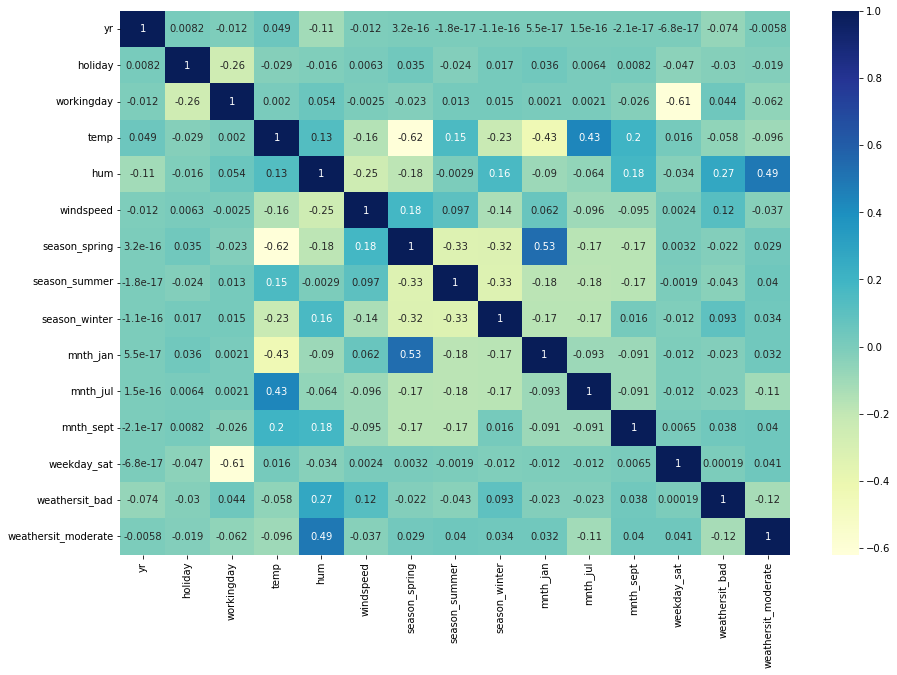

In [44]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.

plt.figure(figsize = (15,10))
sns.heatmap(bs[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='YlGnBu', annot=True)
plt.show()

### Model 2 : Dropping mnth_jan variable

In [45]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value

cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.35e-182
Time:                        21:37:04   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### Model 3 : Dropping hum variable

In [46]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.37e-180
Time:                        21:37:04   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

### Model 4 : Dropping holiday variable

In [47]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.51e-178
Time:                        21:37:04   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

### Model 5 : Dropping mnth_july variable

In [48]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.20e-179
Time:                        21:37:04   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

### Model 6 : Dropping temp variable

In [49]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.14e-147
Time:                        21:37:04   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

### Model 7 : Replace July with spring


In [50]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.84e-92
Time:                        21:37:04   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

### Model 8 : Removing windspeed with spring

In [51]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.75e-142
Time:                        21:37:04   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

### Model 9 

In [52]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.20e-142
Time:                        21:37:04   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

### Model 10 

In [53]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          9.73e-178
Time:                        21:37:04   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

#### `Inference`    
    - Here VIF seems to be almost accepted.
    - p-value for all the features is almost 0.0 and R2 is 0.821 
    - Model 10 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
    - Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [54]:
# Build a model with all columns to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [55]:
# Let us build the finalmodel using sklearn

cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']


In [56]:
# Build a model with above columns

lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164272 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


## 8.4 Model Evaluation

### 8.4.1 `Residual Analysis`

In [57]:
y_train_pred = lr.predict(X_train[cols])

In [58]:
# Plot a histogram of the error terms

def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

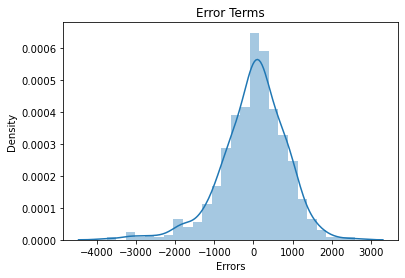

In [59]:
plot_res_dist(y_train, y_train_pred)

#### `Inference`    
    - Errors are normally distribured here with mean 0. So everything seems to be fine

In [60]:
#Print R-squared Value

r2_score(y_train,y_train_pred)

0.8158045196281631

#### `Inference`    
    - R2 Same as we obtained for our final model

### 8.4.2 `Linearity Check`

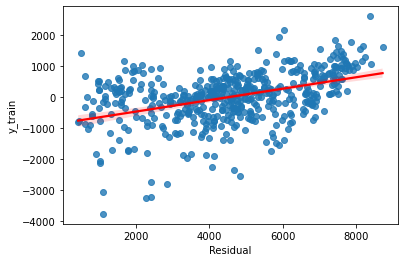

In [61]:
# scatter plot for the check

residual = (y_train - y_train_pred)
sns.regplot(y_train,residual, line_kws={"color": "red"})
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 8.4.2 ` Predict values for test data set`

In [62]:
# Scale variables in X_test

num_vars = ['temp','hum','windspeed']

# Test data to be transformed only, no fitting

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [63]:
# Columns from our final model

cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

# Predict the values for test data

y_test_pred = lr.predict(X_test[cols])

### 8.4.3 ` R squared value between test and predicted test datasets`

In [64]:
# Find out the R squared value between test and predicted test data sets.  

r2_score(y_test,y_test_pred)

0.8127228702995222

# 9. Interepretation of the Model

In [65]:
# final model of manual + rfe approach using statsmodel to interpret it

cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
lm = model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          9.73e-178
Time:                        21:37:05   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

### ` Interepretation Result`

#### The comapany should focus on the following features:
    1. Company should focus on expanding business during Spring.
    2. Company should focus on expanding business during September.
    3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
    4. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact. Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.